###Importing libraries and reading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### Create Features

#### Categorizing the "availability_365" column into 5 categories

In [ ]:
def availability_365_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [ ]:
airbnb['availability_365_categories'] = airbnb.availability_365.map(availability_365_categories_function)
airbnb['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

#### Categorizing the "minimum_nights" column into 5 categories

In [ ]:
def minimum_night_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'very High'

In [ ]:
airbnb['minimum_night_categories'] = airbnb.minimum_nights.map(minimum_night_categories_function)
airbnb['minimum_night_categories']

0         very Low
1         very Low
2              Low
3         very Low
4        very High
           ...    
48890          Low
48891       Medium
48892    very High
48893     very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [ ]:
airbnb.minimum_night_categories.value_counts()

Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: minimum_night_categories, dtype: int64

#### Categorizing the "number_of_reviews" column into 5 categories

In [ ]:
def number_of_reviews_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'very High'

In [ ]:
airbnb['number_of_reviews_categories'] = airbnb.minimum_nights.map(number_of_reviews_categories_function)
airbnb['number_of_reviews_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

#### Categorizing the "price" column into 5 categories

In [ ]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

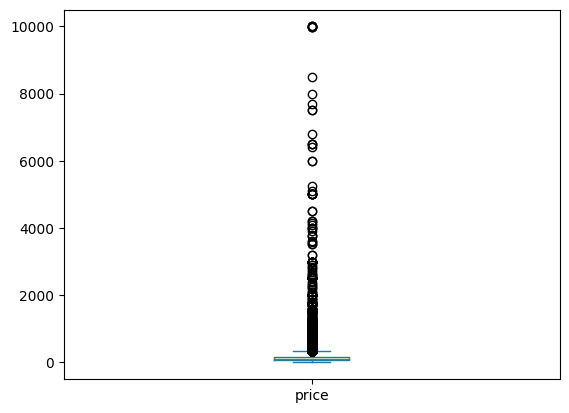

In [ ]:
airbnb.price.plot.box()

In [ ]:
airbnb[airbnb.price == 0].shape

(11, 19)

In [ ]:
def price_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'very High'

In [ ]:
airbnb['price_categories'] = airbnb.minimum_nights.map(price_categories_function)
airbnb['price_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: price_categories, Length: 48895, dtype: object

### Data Analysis - Columns and their values

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.last_review = pd.to_datetime(airbnb.last_review)
airbnb.last_review

<ipython-input-16-8cdfc8b821c9>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  airbnb.last_review = pd.to_datetime(airbnb.last_review)


0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

### Data Types

#### Categorical

In [ ]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [ ]:
# Categorical nominal
categorical_columns = airbnb.columns[[0,1,3,4,5,8,16,17,18,19]]
categorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [ ]:
# To see the first few rows of categorical columns
airbnb[categorical_columns].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,very Low,very High,Medium,Medium


#### Numerical

In [ ]:
numerical_columns = airbnb.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
airbnb[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [ ]:
airbnb[numerical_columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Coordinates and dates

In [ ]:
coordinates = airbnb.columns[[5,6,12]]
airbnb[coordinates]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,2018-10-19
1,Midtown,40.75362,2019-05-21
2,Harlem,40.80902,NaT
3,Clinton Hill,40.68514,2019-05-07
4,East Harlem,40.79851,2018-11-19
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaT
48891,Bushwick,40.70184,NaT
48892,Harlem,40.81475,NaT
48893,Hell's Kitchen,40.75751,NaT


### Missing Values

In [ ]:
# To see the number of missing values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

In [ ]:
# Percentage of missing values
round((airbnb.isnull().sum()/len(airbnb))*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
availability_365_categories        0.00
minimum_night_categories           0.00
number_of_reviews_categories       0.00
price_categories                   0.00
dtype: float64

#### Missing value Analysis

In [ ]:
# Selecting the data with missing values for 'last_review' feature
airbnb1 = airbnb.loc[airbnb.last_review.isnull(),:]
airbnb1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low,very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,Low,very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,Low,very Low,very Low,very Low


#### Missing values Analysis ('neighbourhood_group' feature)

In [ ]:
# Count of 'neighbourhood_group' with missing values
airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [ ]:
# Count of 'neighbourhood_group'
airbnb.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
round((airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100,2)

neighbourhood_group
Bronx            19.71
Brooklyn         18.19
Manhattan        23.22
Queens           19.27
Staten Island    15.82
Name: neighbourhood_group, dtype: float64

<Axes: xlabel='neighbourhood_group'>

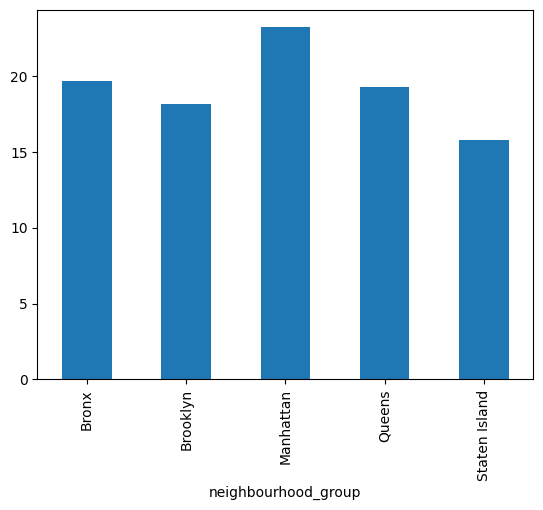

In [ ]:
((airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()


In [ ]:
((airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()


19.240898461107257

Each neighbourhood_group has about 19 % missing values in 'last_review' feature

In [ ]:
airbnb1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low,very Low


#### Missing values Analysis ('room_type' feature)

In [ ]:
# Count of 'room_type' with missing values
airbnb3 = (airbnb1.groupby('room_type').room_type.count()/airbnb.groupby('room_type').room_type.count())*100
airbnb3

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

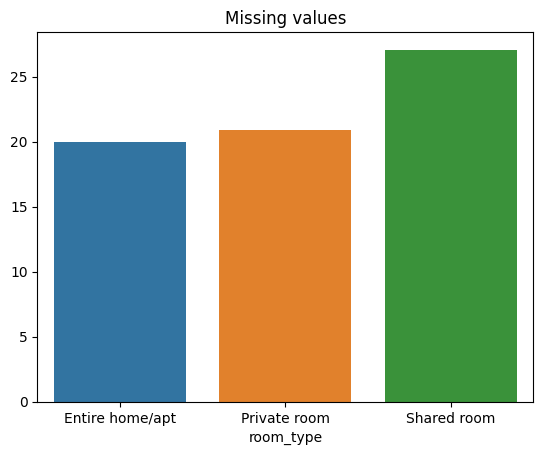

In [ ]:
plt.title('Missing values')
sns.barplot(x = airbnb3.index, y = airbnb3.values)
plt.show()

'Shared room' has the highest missing value percentage (27 %) for 'last_review' feature while to other room types has only about 20 %

In [ ]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', airbnb[airbnb['last_review'].isnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', airbnb[airbnb['last_review'].notnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.317946605566
Median =  101.0


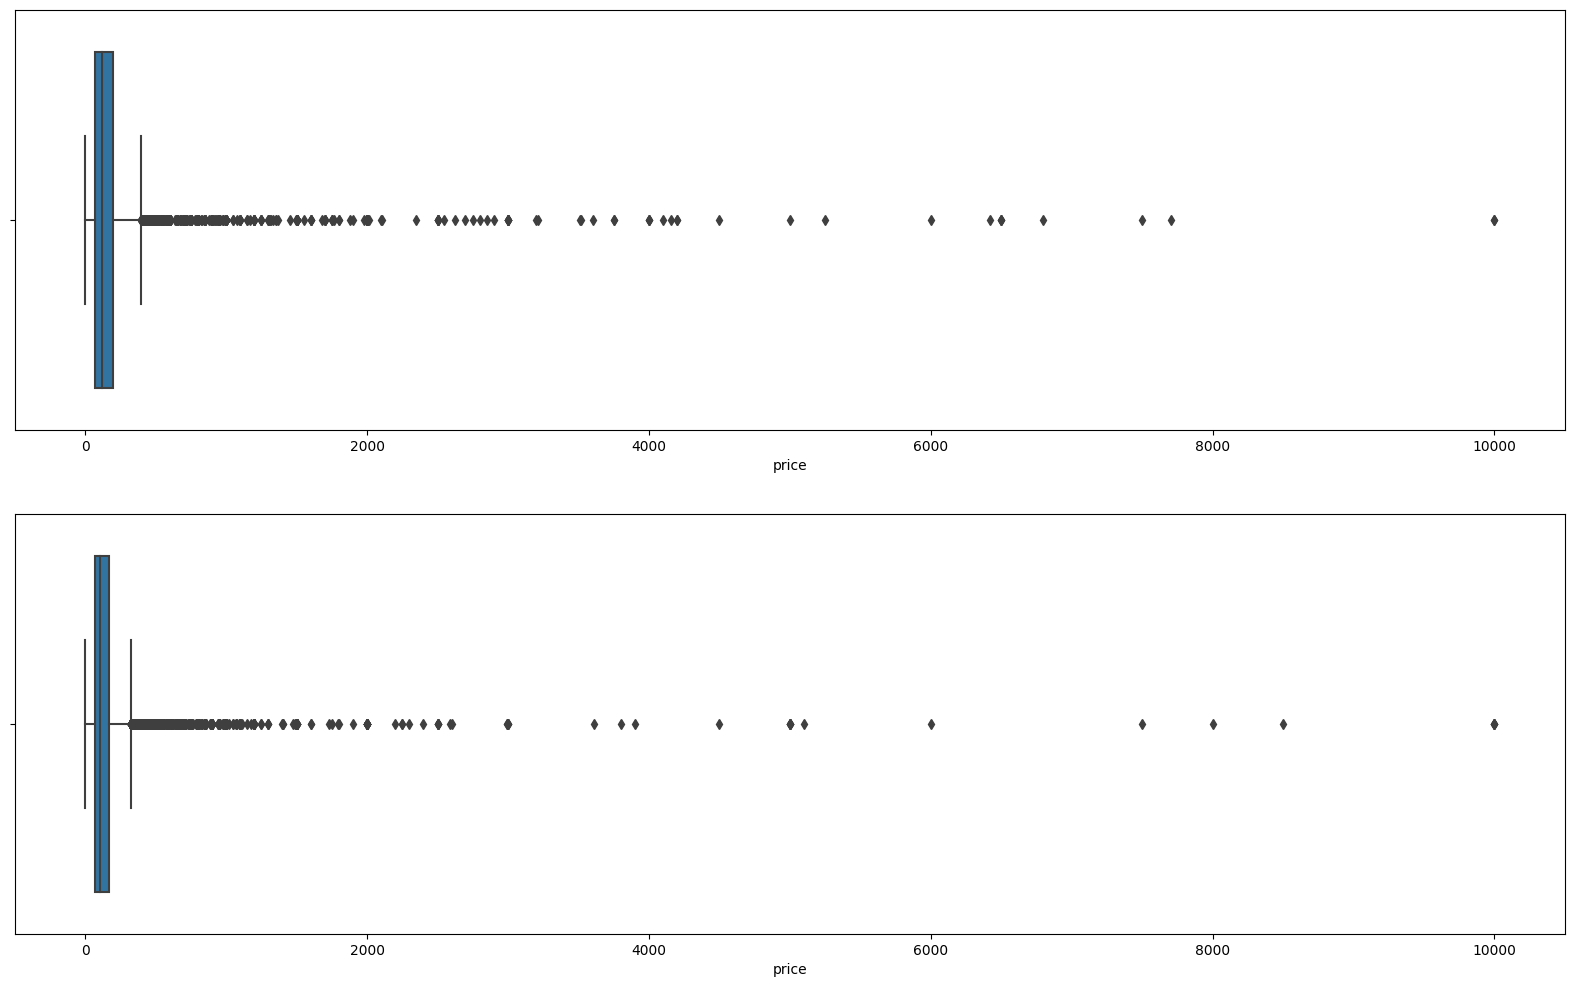

In [ ]:

plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = airbnb[airbnb['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = airbnb[airbnb['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

- The pricing is higher when 'last_review' feature is missing .
- reviews are less likely to be given for shared rooms
- When the prices are high reviews are less likely to be given
- The above analysis seems to show that the missing values here are not MCAR (missing completely at random)

### Univariate Analysis

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


Column "name"

In [ ]:
airbnb.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

Column "host_id"

In [ ]:
airbnb.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

Column "host_name"

In [ ]:
airbnb.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
airbnb.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

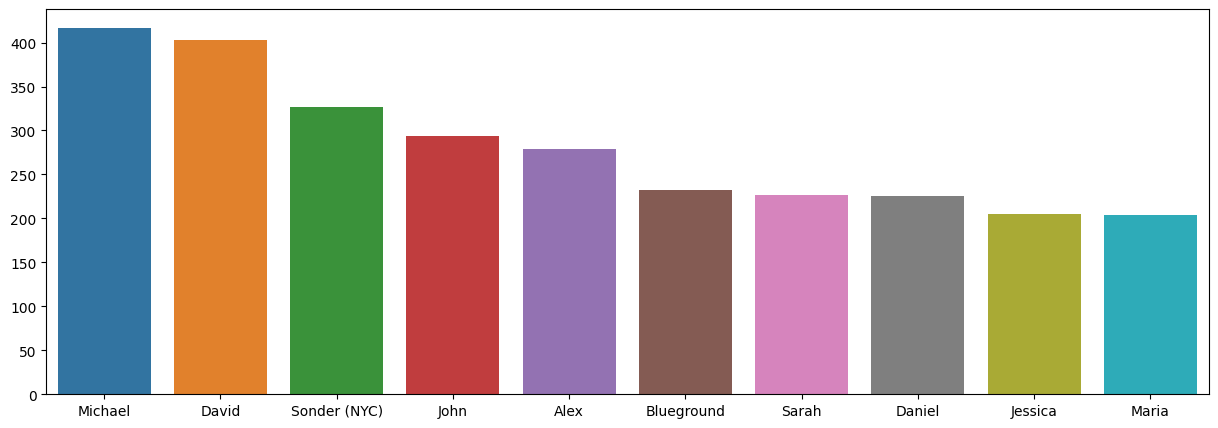

In [ ]:
# Top 10 host's
plt.figure(figsize=(15,5))
sns.barplot(x = airbnb.host_name.value_counts().index[:10] , y = airbnb.host_name.value_counts().values[:10])
plt.show()

Column "neighbourhood_group"

In [ ]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
airbnb.neighbourhood_group.value_counts(normalize= True) * 100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

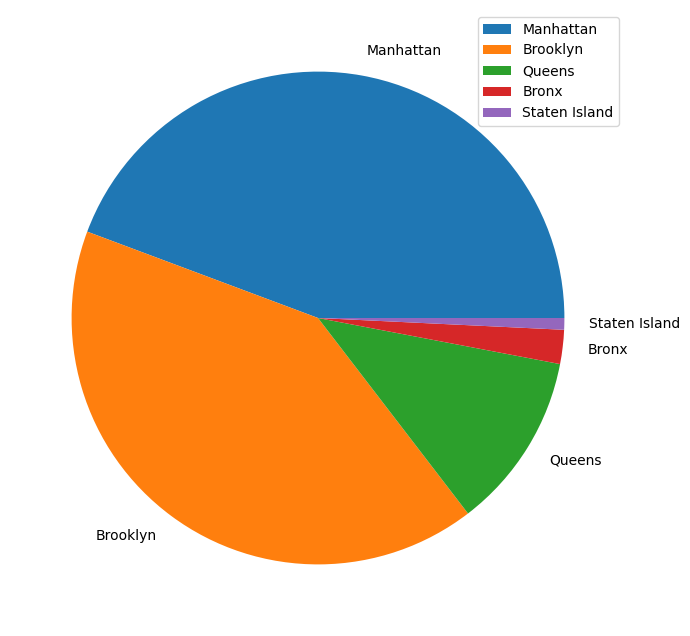

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x = airbnb.neighbourhood_group.value_counts(normalize= True) * 100,labels = airbnb.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

What are the neighbourhoods they need to target?
81 % of the listing are Manhattan and Brooklyn neighbourhood_group

Column "neighbourhood"

In [ ]:
airbnb.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


Column "room_type"

In [ ]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
airbnb.room_type.value_counts(normalize=True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

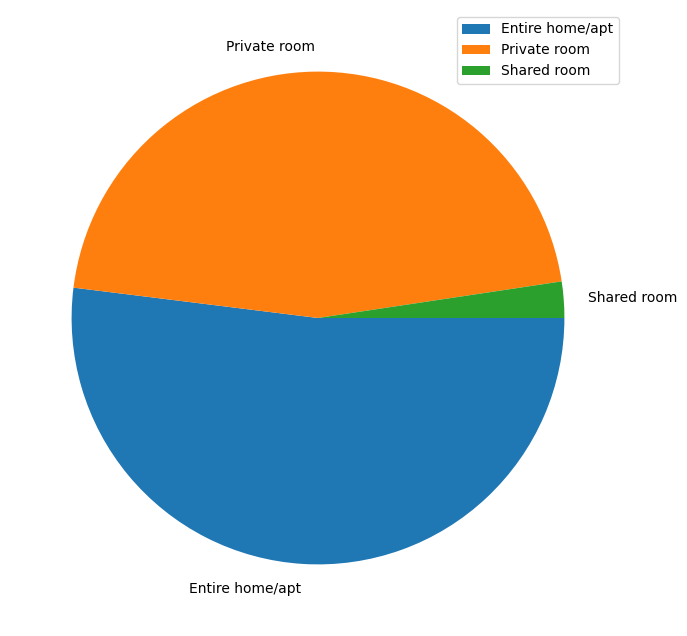

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(x = airbnb.room_type.value_counts(normalize= True) * 100,labels = airbnb.room_type.value_counts(normalize= True).index,counterclock=False)
plt.legend()
plt.show()

Column "price"

In [ ]:
airbnb.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<Axes: ylabel='Frequency'>

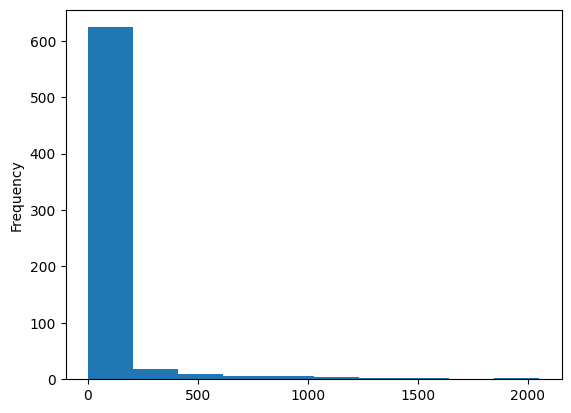

In [ ]:
airbnb.price.value_counts().plot.hist()

<Axes: xlabel='price', ylabel='Count'>

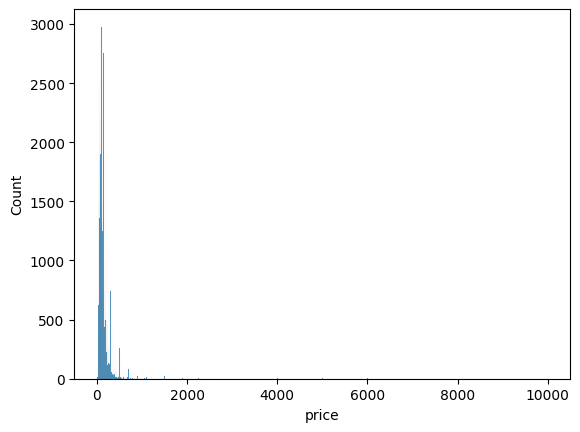

In [ ]:
sns.histplot(data = airbnb.price)

<Axes: xlabel='price', ylabel='Count'>

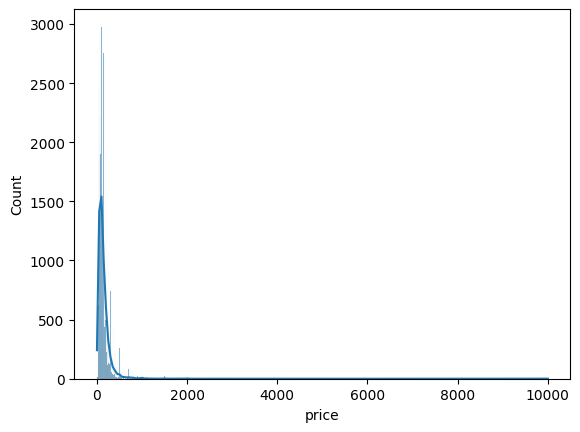

In [ ]:
sns.histplot(data = airbnb.price,kde = True)

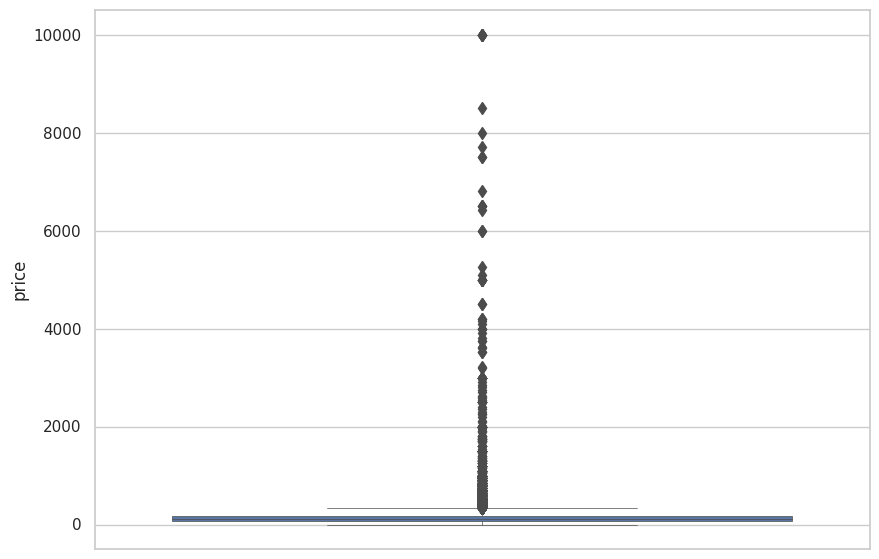

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(y = airbnb.price,width=0.8,
    dodge=True,
    fliersize=6,
    linewidth=.5,
    whis=1.5,
    color=None)
plt.show()

Column "minimum_nights"

In [ ]:
airbnb.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [ ]:
airbnb.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

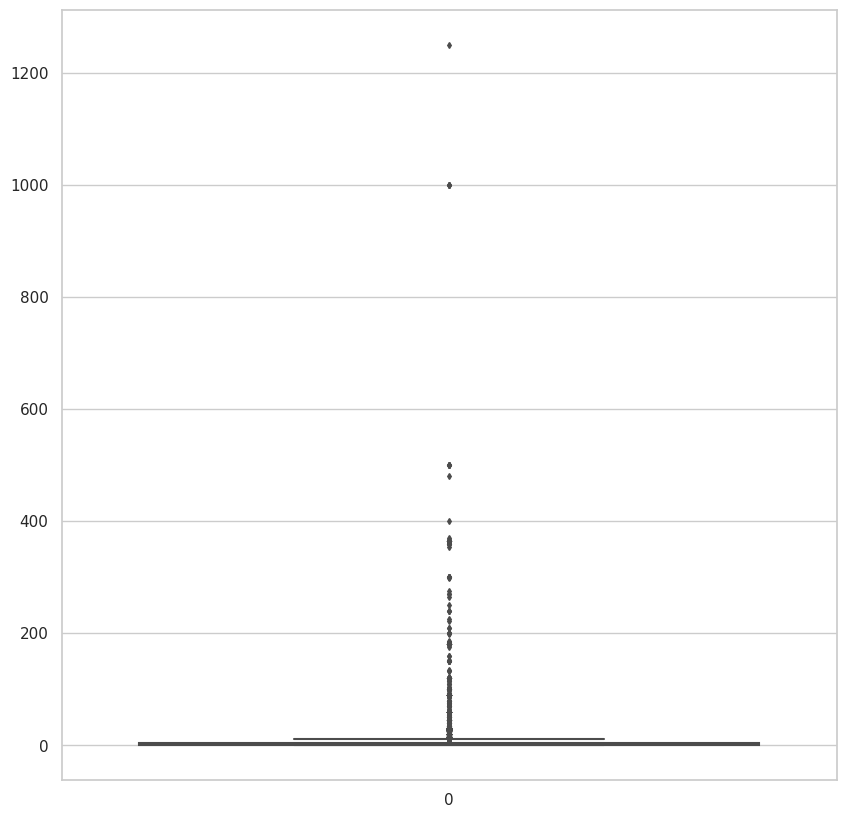

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = airbnb.minimum_nights,fliersize=3)
plt.show()

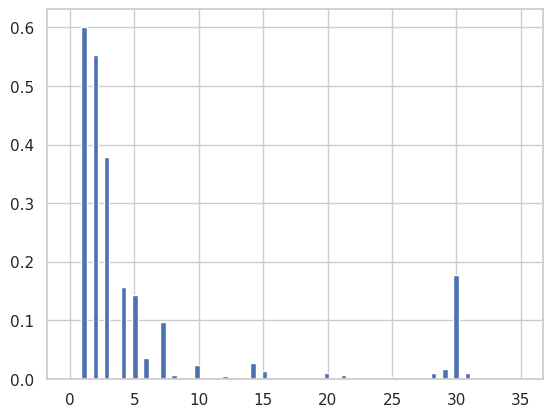

In [ ]:
plt.hist(data = airbnb, x = 'minimum_nights',bins=80,range=(0,35),density=True)
plt.show()

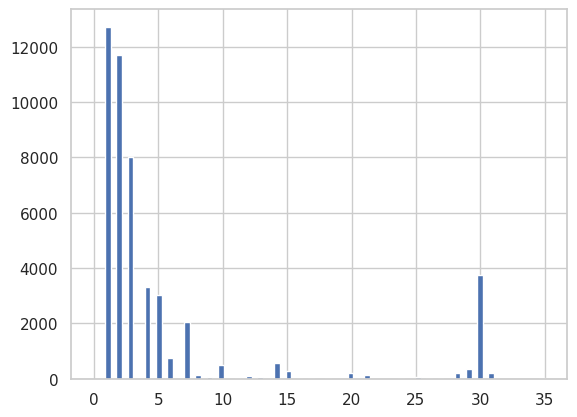

In [ ]:
plt.hist(data = airbnb, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

Column "number_of_reviews"

In [ ]:
airbnb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

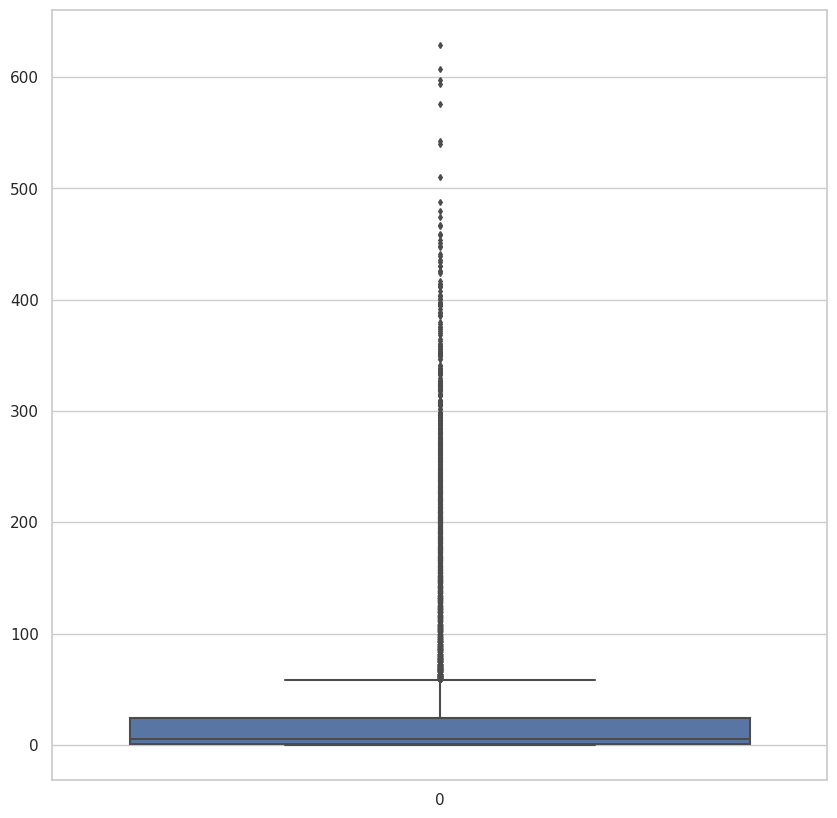

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = airbnb.number_of_reviews,fliersize=3)
plt.show()

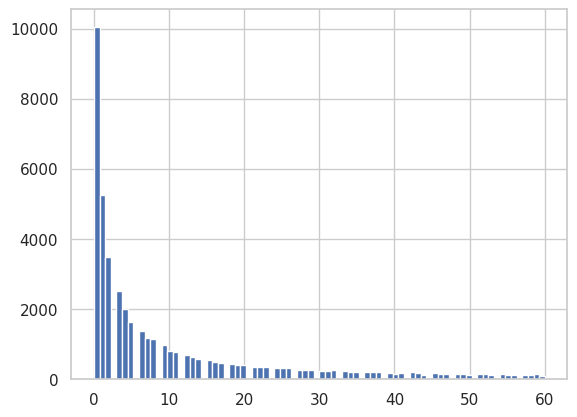

In [ ]:
plt.hist(data = airbnb, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

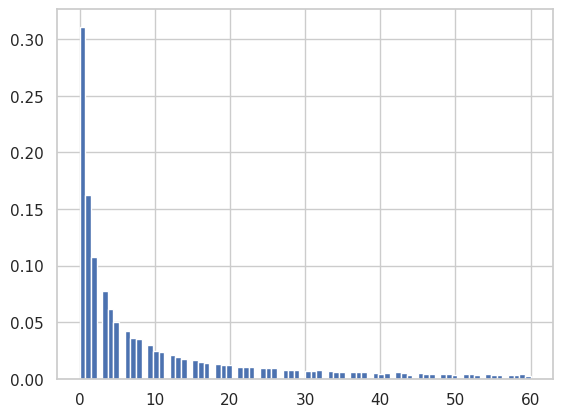

In [ ]:
plt.hist(data = airbnb, x = 'number_of_reviews',bins=80,range=(0,60),density=True)
plt.show()

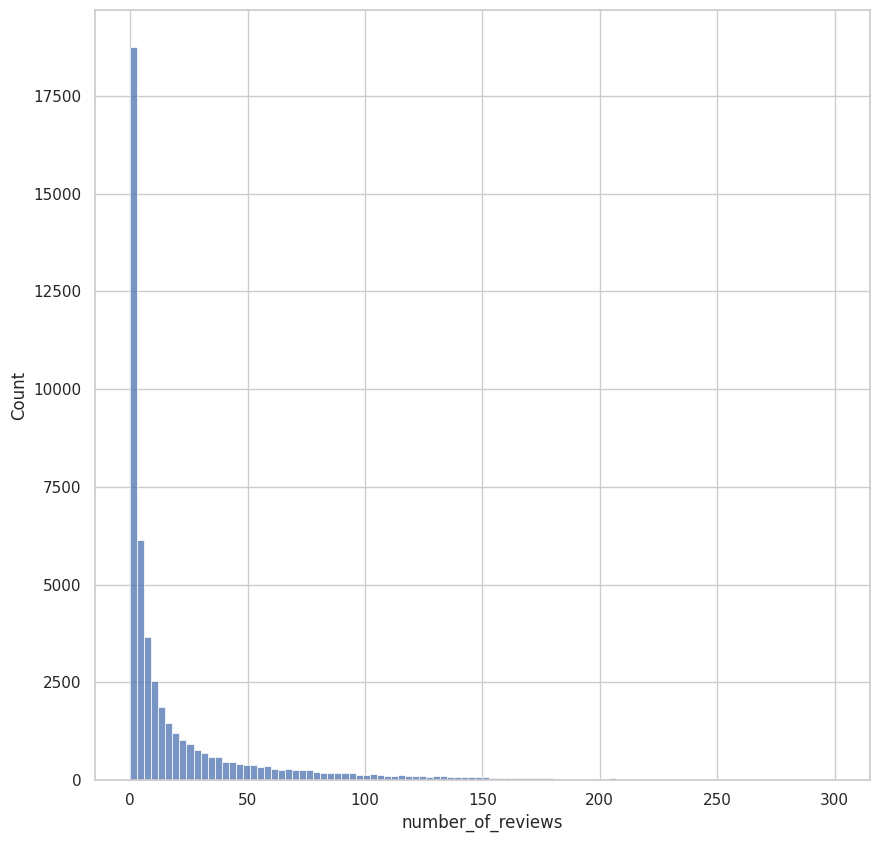

In [ ]:
plt.figure(figsize = (10,10))
sns.histplot(data = airbnb, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

Column "reviews_per_month"

In [ ]:
airbnb.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

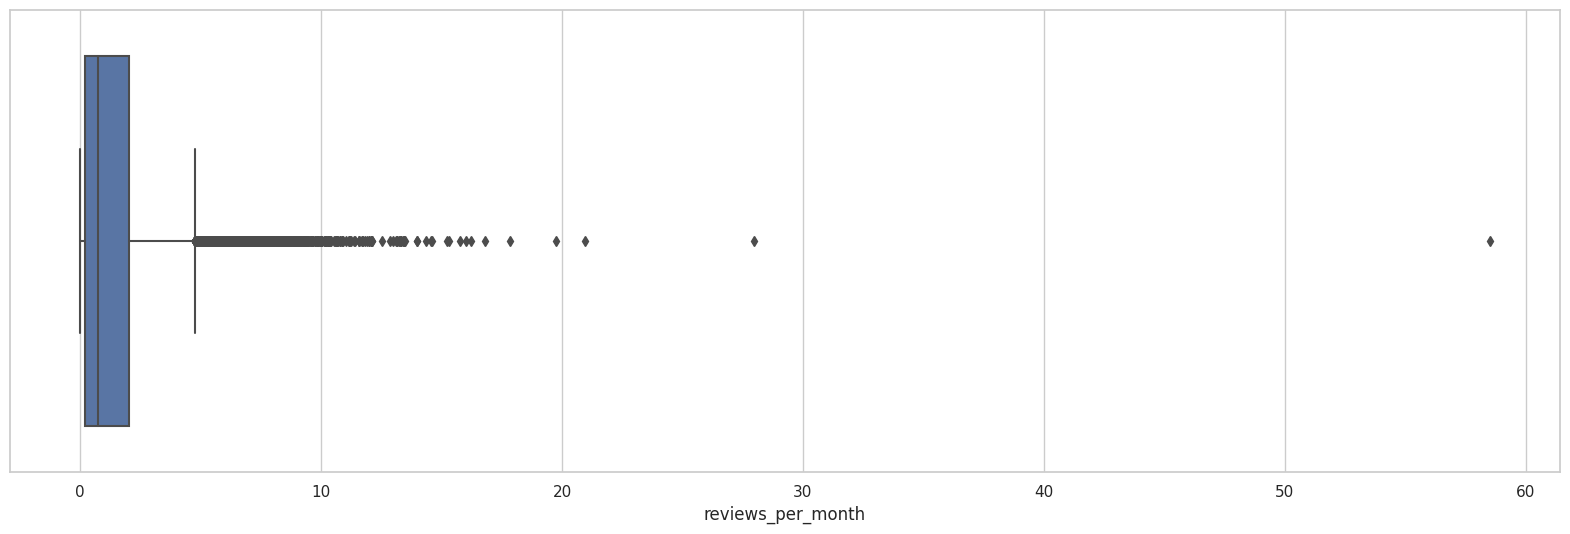

In [ ]:
plt.figure(figsize = (20,6))
sns.boxplot(data = airbnb , x = 'reviews_per_month')
plt.show()

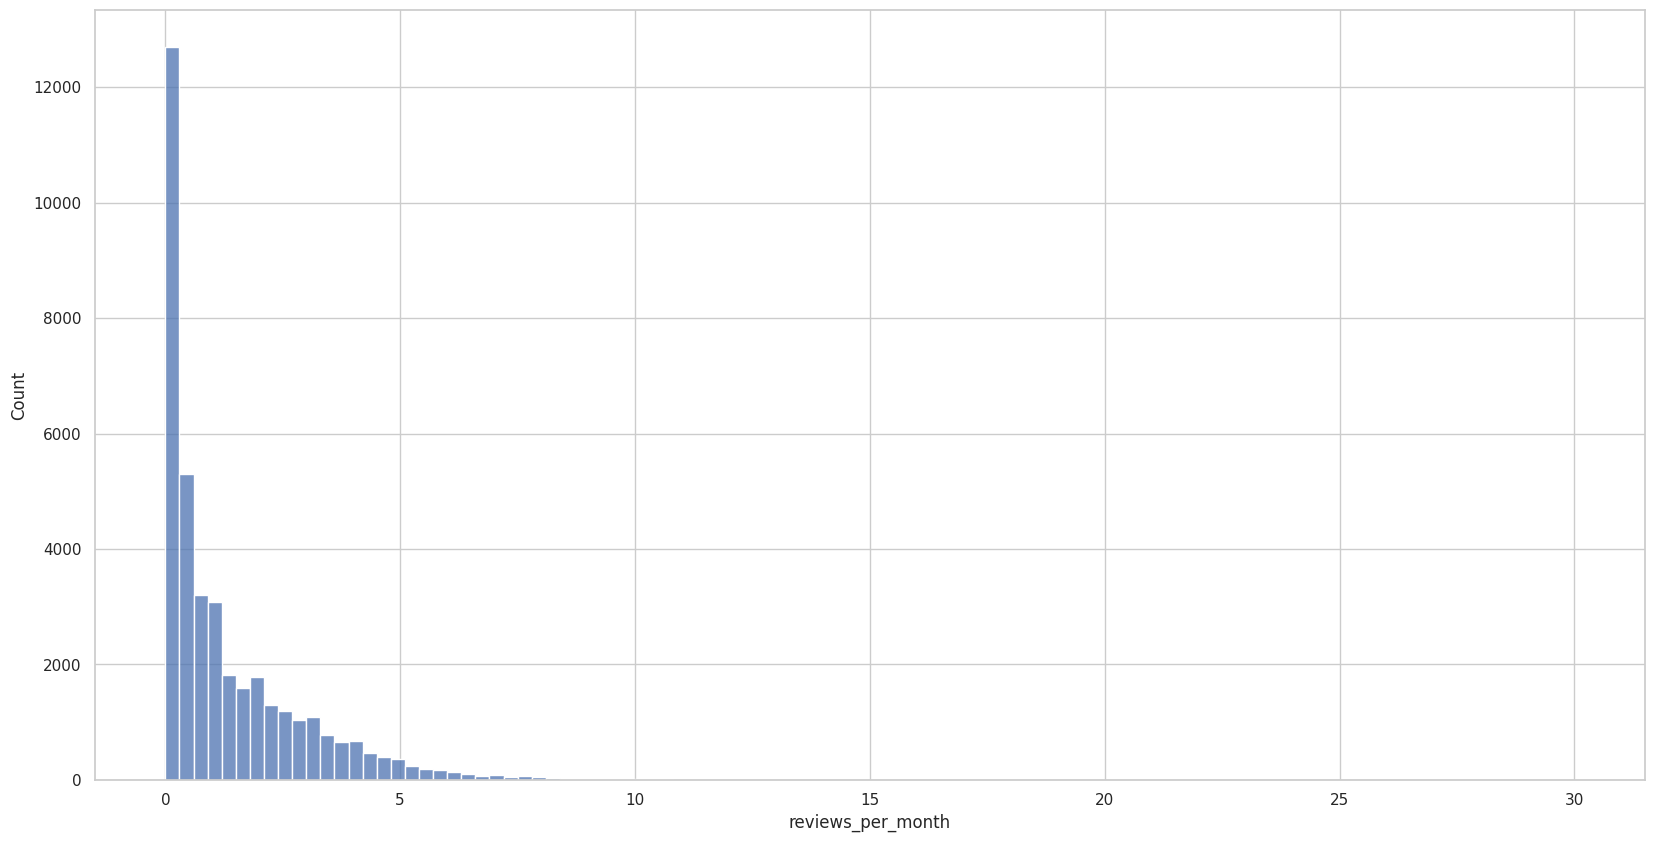

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'reviews_per_month',bins=100,binrange=(0,30))
plt.show()

Column "calculated_host_listings_count"

In [ ]:
airbnb.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

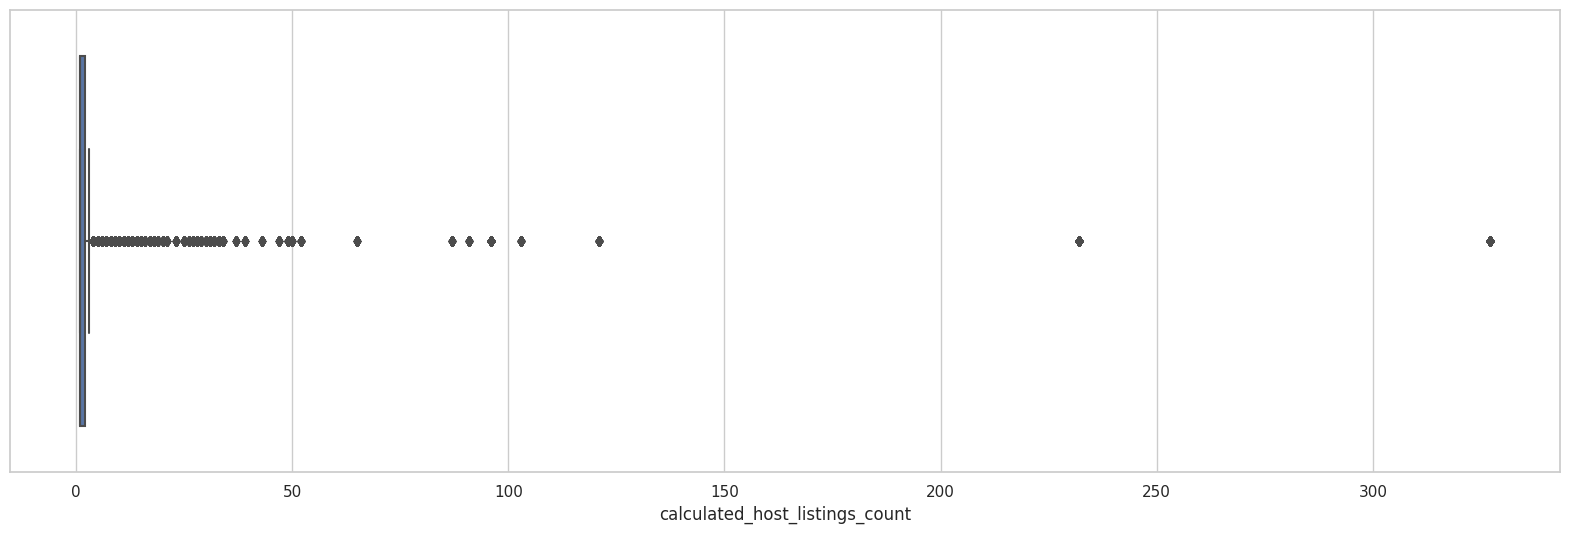

In [ ]:
plt.figure(figsize = (20,6))
sns.boxplot(data = airbnb , x = 'calculated_host_listings_count')
plt.show()

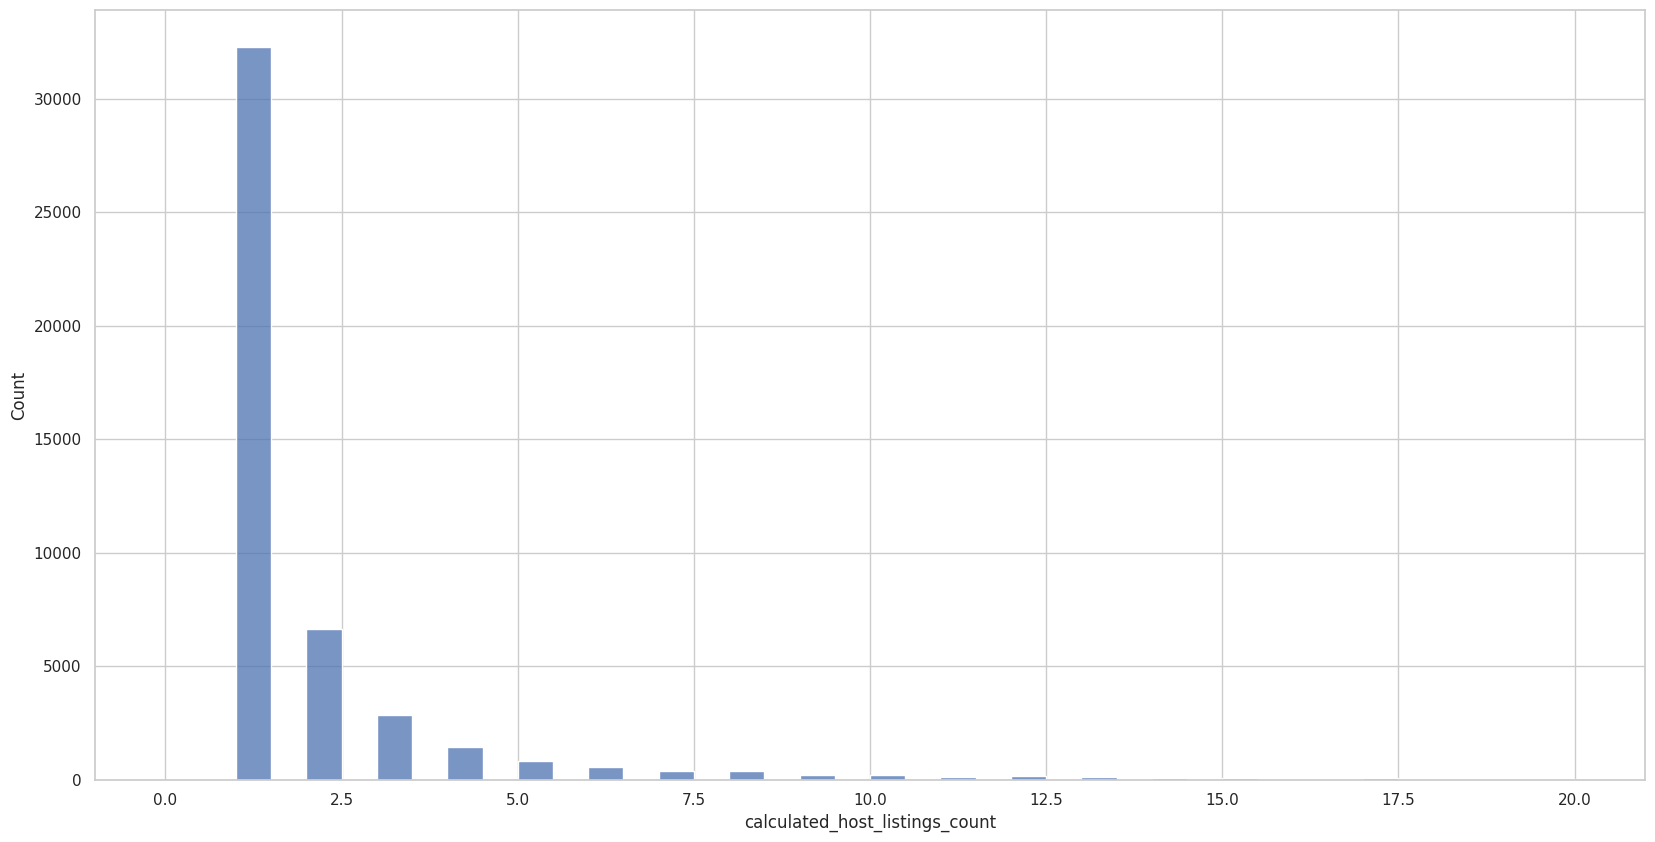

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

Column "availability_365"

In [ ]:
airbnb.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

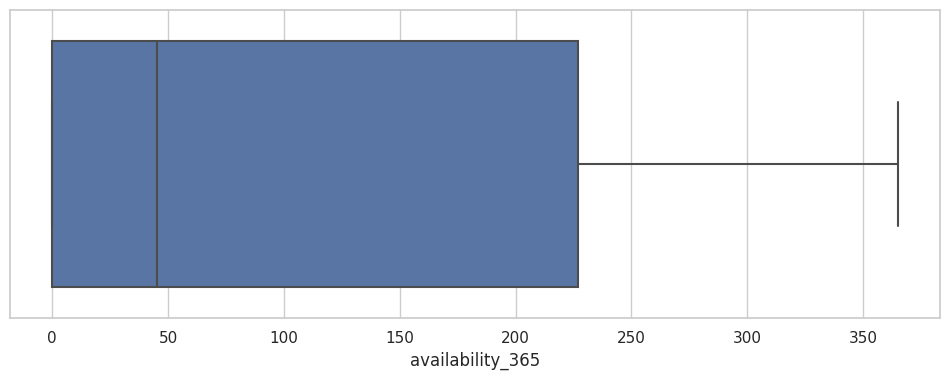

In [ ]:
plt.figure(figsize = (12,4))
sns.boxplot(data = airbnb , x = 'availability_365')
plt.show()

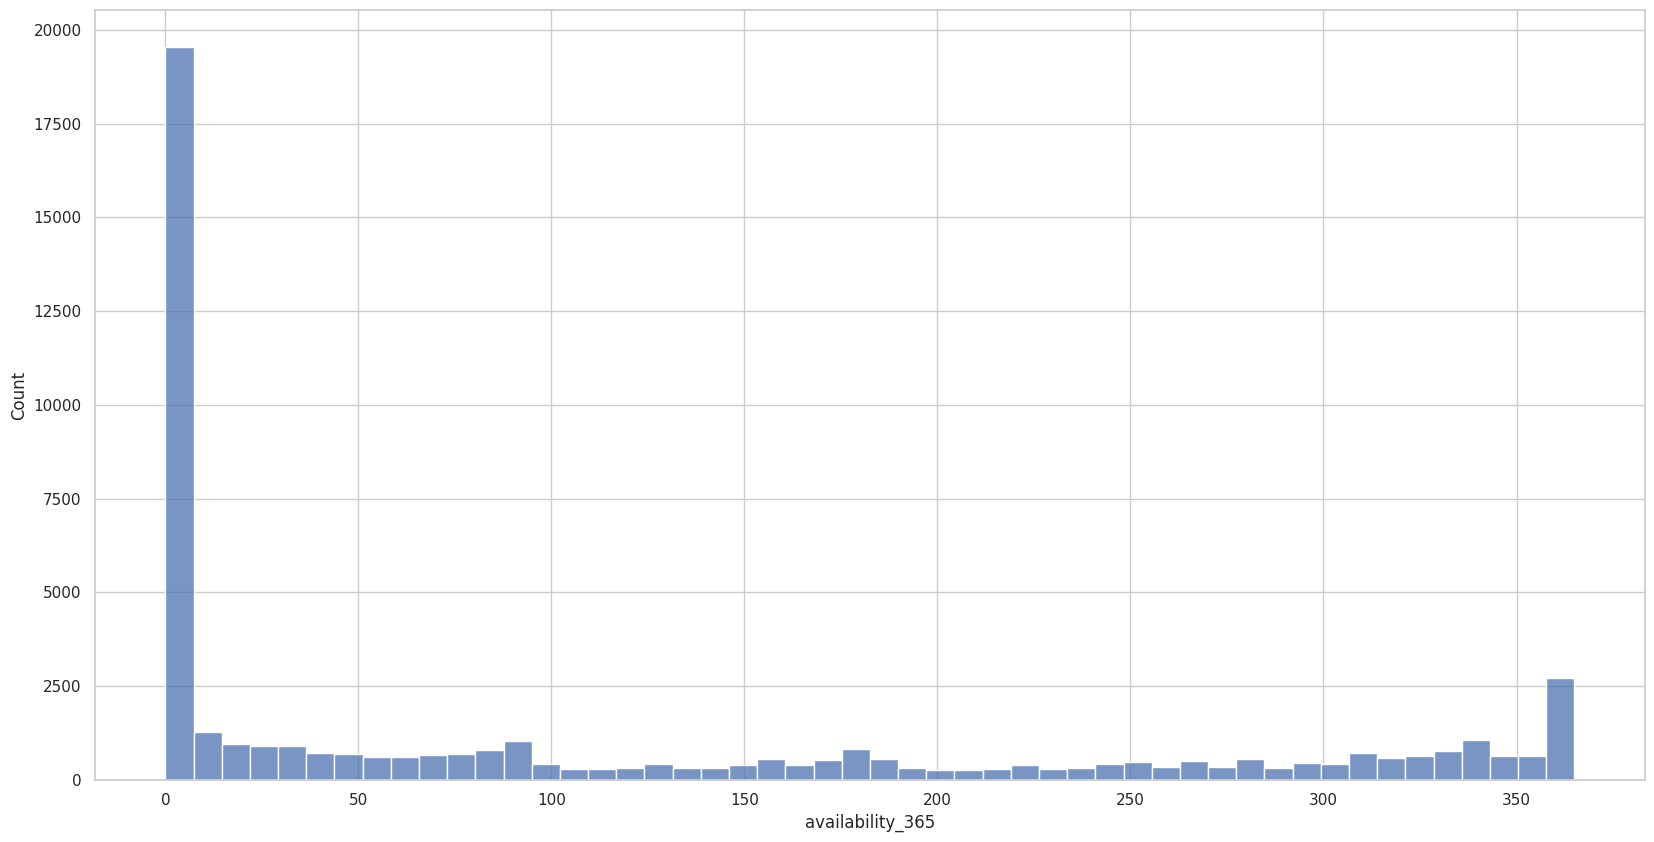

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'availability_365',bins=50,binrange=(0,365))
plt.show()

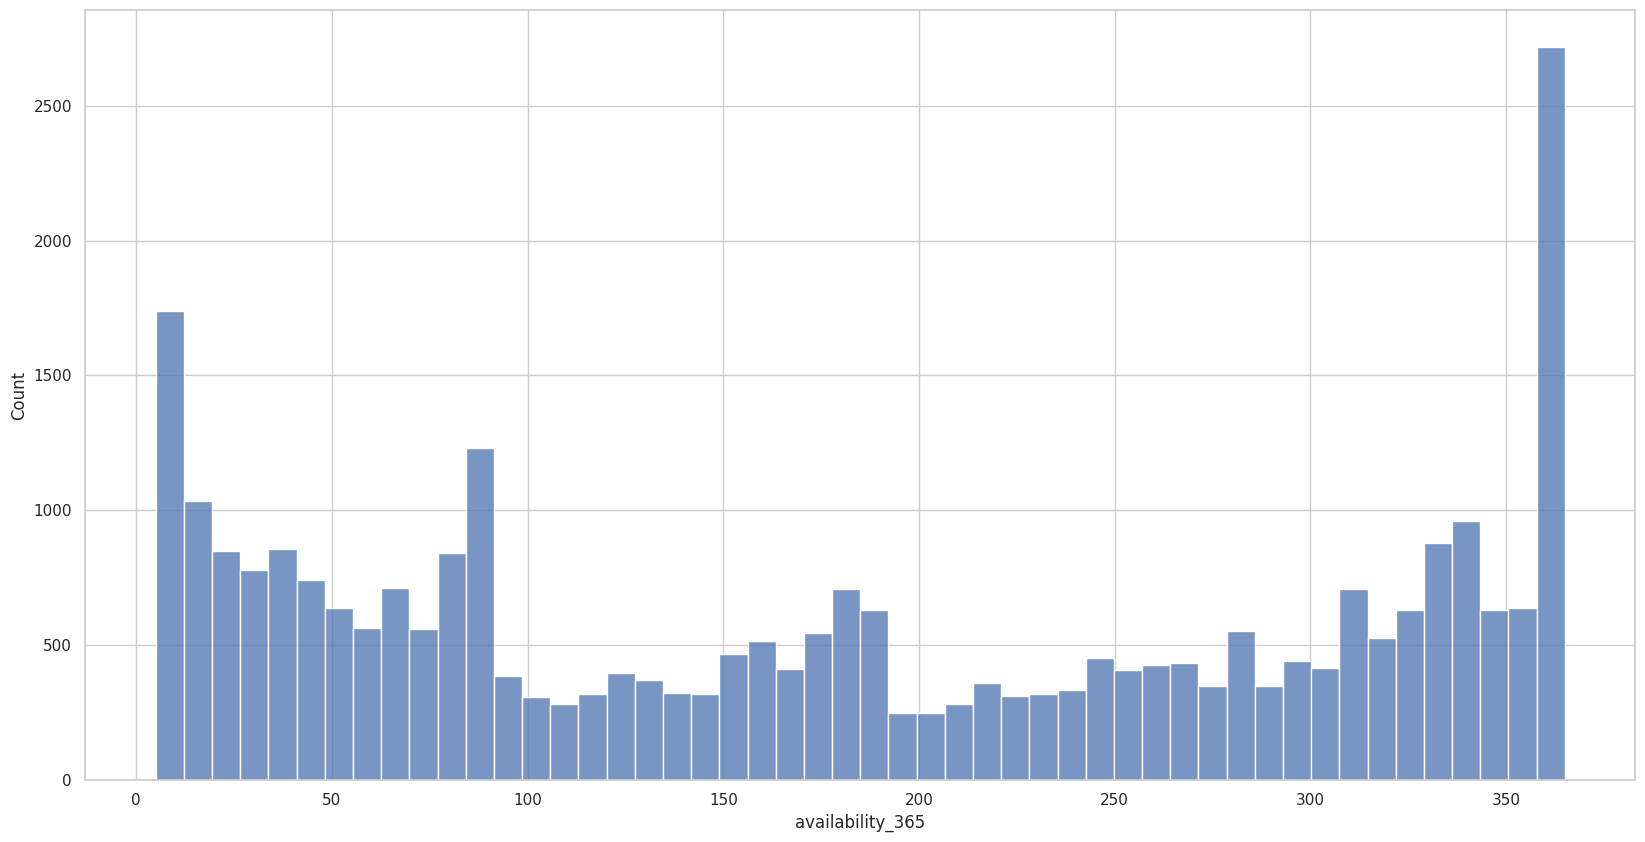

In [ ]:
plt.figure(figsize = (20,10))
sns.histplot(data = airbnb, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

Column "minimum_night_categories"

In [ ]:
airbnb.minimum_night_categories.value_counts(normalize= True)*100

Low          40.280192
very Low     26.014930
very High    14.997444
Medium       12.960425
High          5.747009
Name: minimum_night_categories, dtype: float64

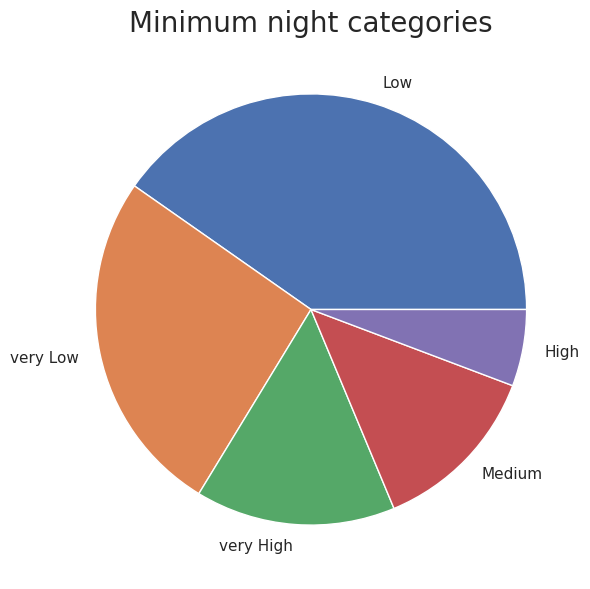

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Minimum night categories', fontdict={'fontsize': 20})
plt.pie(x = airbnb.minimum_night_categories.value_counts(),labels=airbnb.minimum_night_categories.value_counts().index)
plt.show()

Column "number_of_reviews_categories"

In [ ]:
airbnb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
airbnb.number_of_reviews_categories.value_counts()

Low          26032
very Low     12720
High          5893
Medium        3503
very High      747
Name: number_of_reviews_categories, dtype: int64

In [ ]:
airbnb.number_of_reviews_categories.value_counts(normalize=True)*100

Low          53.240618
very Low     26.014930
High         12.052357
Medium        7.164332
very High     1.527764
Name: number_of_reviews_categories, dtype: float64

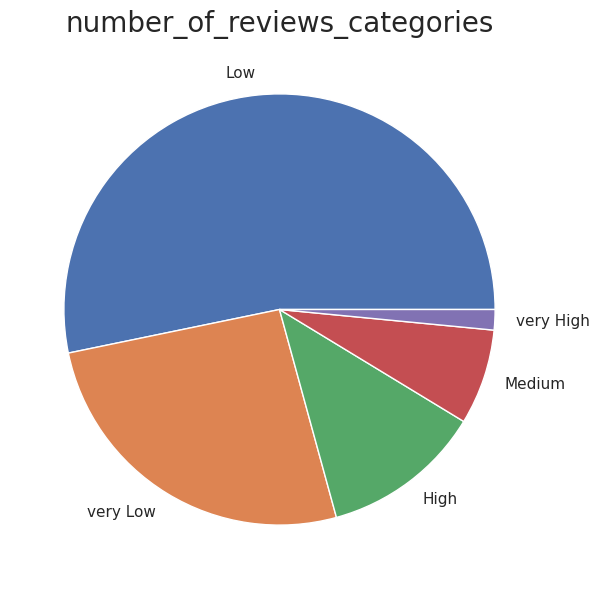

In [ ]:
plt.figure(figsize=(12,7))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 20})
plt.pie(x = airbnb.number_of_reviews_categories.value_counts(),labels=airbnb.number_of_reviews_categories.value_counts().index)
plt.show()

Column "price_categories"

In [ ]:
airbnb['price_categories'].value_counts()

Low          22998
very Low     12720
Medium        7556
High          5447
very High      174
Name: price_categories, dtype: int64

In [ ]:

airbnb['price_categories'].value_counts(normalize=True)*100

Low          47.035484
very Low     26.014930
Medium       15.453523
High         11.140198
very High     0.355865
Name: price_categories, dtype: float64

In [ ]:
airbnb['price_categories'].describe()

count     48895
unique        5
top         Low
freq      22998
Name: price_categories, dtype: object

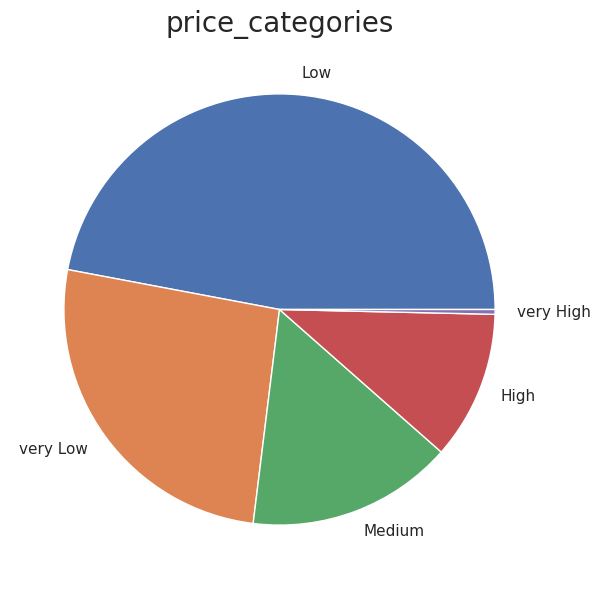

In [ ]:
plt.figure(figsize=(12,7))
plt.title('price_categories', fontdict={'fontsize': 20})
plt.pie(x = airbnb.price_categories.value_counts(),labels=airbnb.price_categories.value_counts().index,)
plt.show()

What is the pricing ranges preferred by customers?
'Low' price ranges are preferred by custumers followed by very 'Low' price ranges.

### Bivariate and Multivariate Analysis

####Finding the Correlations

In [ ]:
airbnb[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [ ]:
airbnb[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


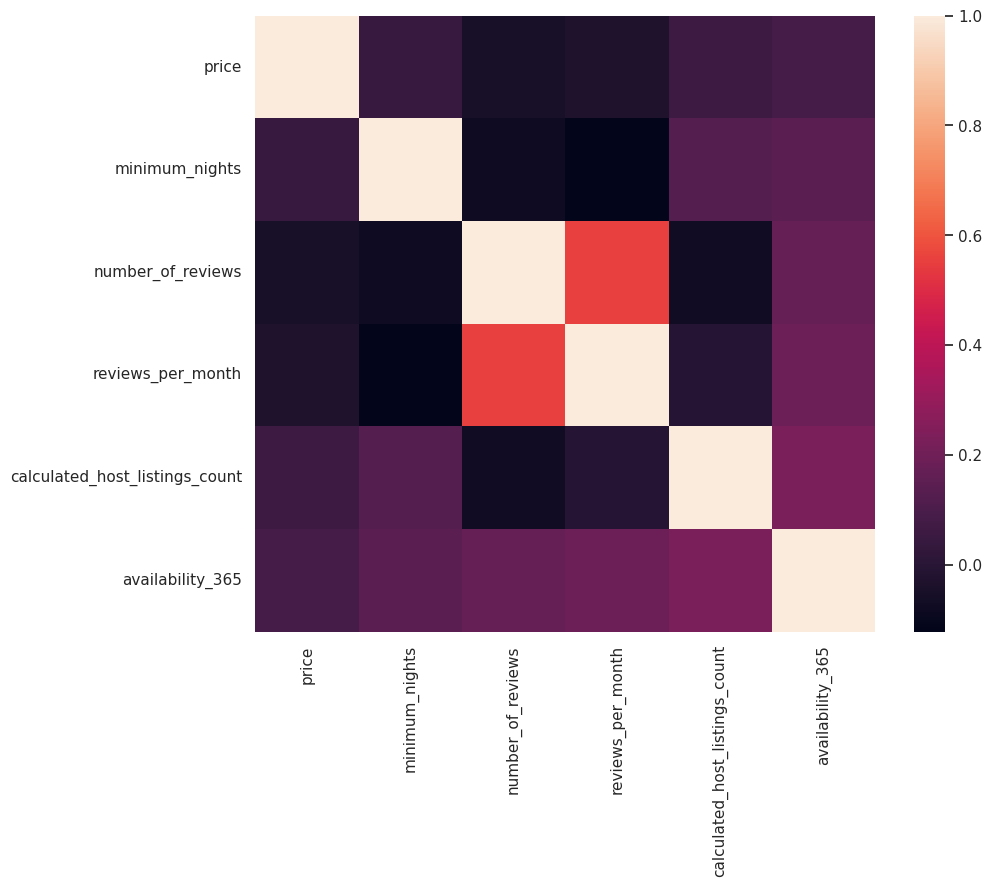

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = airbnb[numerical_columns].corr())
plt.show()

#### Finding the Top Correlations

In [ ]:
corr_matrix = airbnb[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [ ]:
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.121702,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.549868,0.072376,0.172028
reviews_per_month,0.030608,0.121702,0.549868,1.000000,0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,0.072376,0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [ ]:
sol

number_of_reviews               reviews_per_month                 0.549868
calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                number_of_reviews                 0.047954
                                minimum_nights                    0.042799
                         

In [ ]:
# Top meaningful correlations
sol[1:8]

calculated_host_listings_count  availability_365                  0.225701
reviews_per_month               availability_365                  0.185791
number_of_reviews               availability_365                  0.172028
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.121702
price                           availability_365                  0.081829
dtype: float64

number_of_reviews_categories and prices

In [ ]:
# prices for each of reviews_categories
x1 = airbnb.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
very Low     1806531
High          971346
Medium        508647
very High     178431
Name: price, dtype: int64

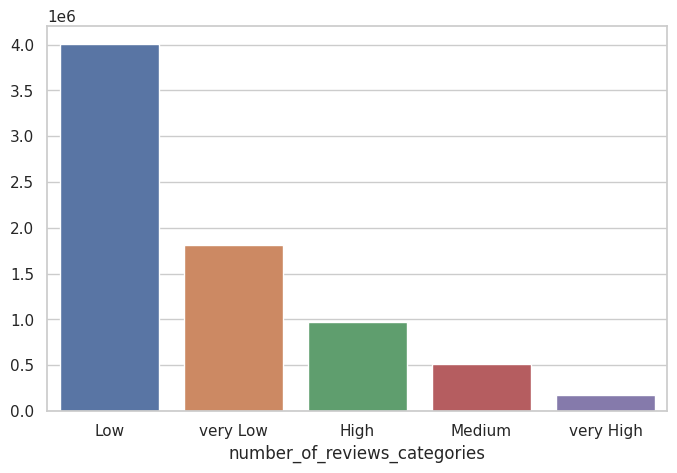

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<Axes: xlabel='number_of_reviews_categories', ylabel='price'>

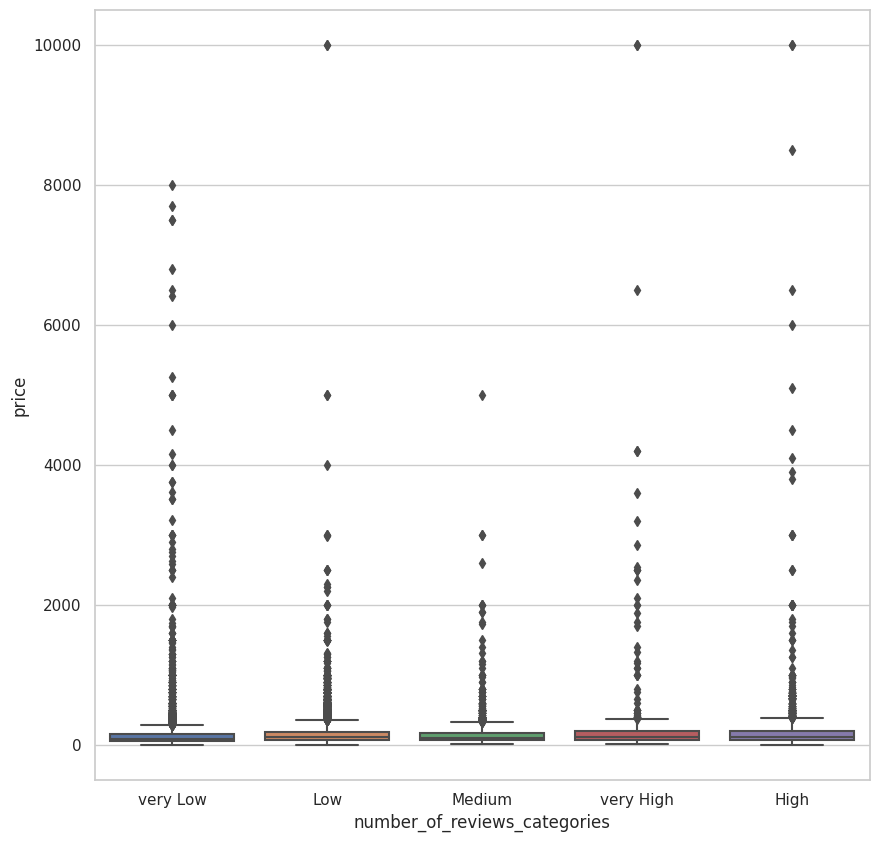

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = airbnb.number_of_reviews_categories , y = airbnb.price)

In [ ]:
airbnb.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
very High    238.863454
Name: price, dtype: float64

In [ ]:
airbnb.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
very Low      90.0
Medium       105.0
High         120.0
Low          120.0
very High    120.0
Name: price, dtype: float64

In [ ]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,very Low,1806531
2,High,971346
3,Medium,508647
4,very High,178431


In [ ]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
very High     2.389505
Medium        6.811679
High         13.008033
very Low     24.192631
Low          53.598152
Name: price, dtype: float64

What is the pricing ranges preferred by customers?
The total price for 'Low' or 'very Low' number_of_reviews_categories are high.

#### 'room_type' and 'number_of_reviews_categories'

In [ ]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
pd.crosstab(airbnb['room_type'], airbnb['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [ ]:
airbnb.groupby('room_type').number_of_reviews.sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [ ]:
airbnb.groupby('room_type').number_of_reviews.sum()/airbnb.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

The various kinds of properties that exist w.r.t. customer preferences.?
Entire home/apt have more reviews than Shared rooms
'Shared room' are less likey to give reviews. only 16 %

#### 'room_type' and 'price_categories'

In [ ]:
pd.crosstab(airbnb['room_type'], airbnb['price_categories'])

price_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3714,13086,4262,120,4227
Private room,1620,9597,3170,52,7887
Shared room,113,315,124,2,606


####  'room_type' and 'reviews_per_month'

In [ ]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
airbnb.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

In [ ]:
airbnb.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.66
Private room       0.77
Shared room        0.98
Name: reviews_per_month, dtype: float64

In [ ]:
airbnb.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

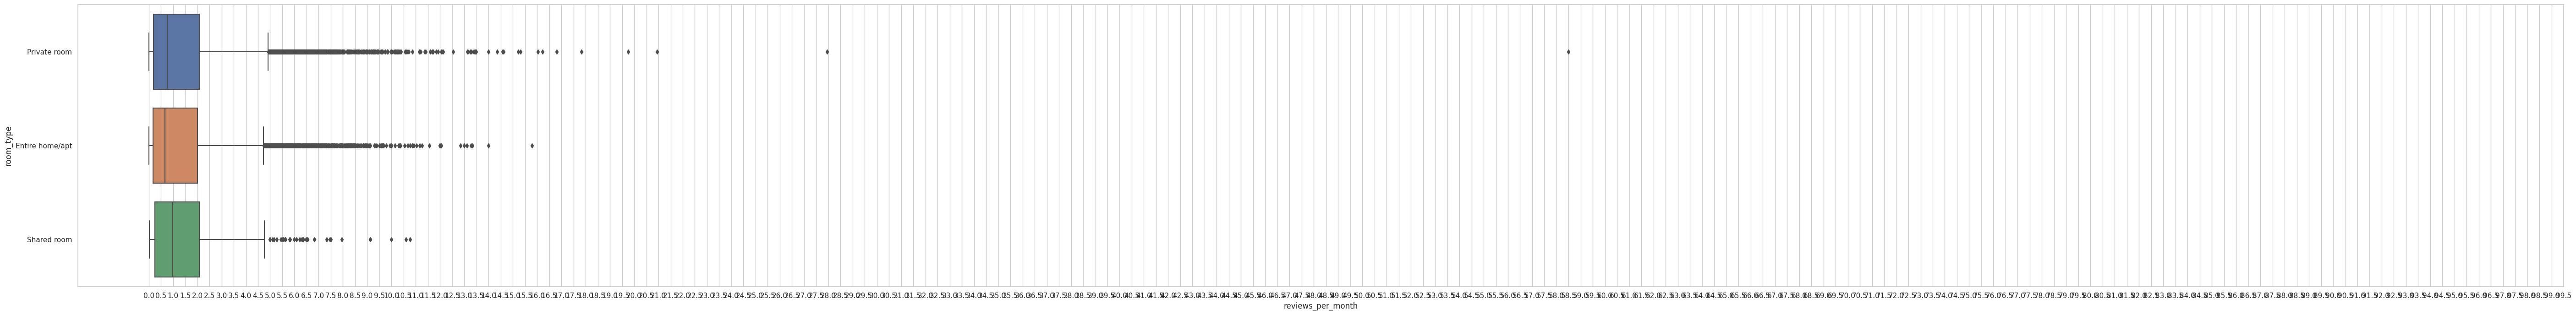

In [ ]:
plt.figure(figsize=(70,8))
sns.boxplot(data = airbnb, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

For each 'room_type' there are ~1.4 reviews per month on average.

#### minimum_night_categories and reviews_per_month

In [ ]:
airbnb.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
very High     2235.19
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

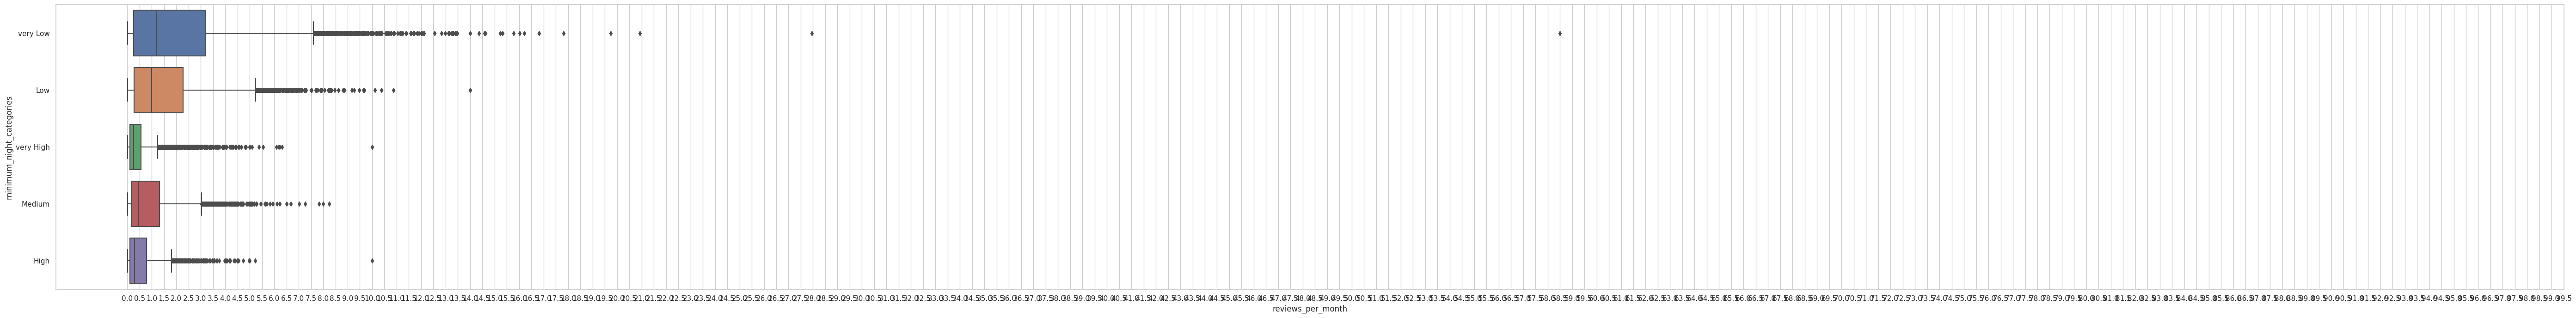

In [ ]:
plt.figure(figsize=(70,8))
sns.boxplot(data = airbnb, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

Customer's are more likely to leave reviews for low number of minimum nights
Adjustments in the existing properties to make it more customer-oriented. ?
minimum_nights should be on the lower side to make properties more customer-oriented

#### 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [ ]:
airbnb.availability_365_categories.value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

In [ ]:
pd.DataFrame(airbnb.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       0.598431
                            Low                        2.200373
                            Medium                     1.056111
                            very High                  0.342308
                            very Low                   3.289381
Low                         High                       0.638307
                            Low                        1.783956
                            Medium                     0.883844
                            very High                  0.803750
                            very Low                   2.896114
Medium                      High                       0.591070
                            Low                        1.993565
                            Medium                     1.157492
                            very High                  0.517500
                            very Low                   2.893918
very High                   High                       0.428464
                            Low                        1.490562
                            Medium                     0.694283
                            very High                  0.276571
                            very Low                   2.206077
very Low                    High                       0.337780
                            Low                        0.506051
                            Medium                     0.276970
                            very High                  0.480588
                            very Low                   0.673759

If the combination of availability and price is very high, reviews_per_month will be low on average.
Very high availability and very low price are likely to get more reviews.

In [ ]:
airbnb.to_csv('AB_NYC_2019_processed.csv')